In this notebook, I will extract all patents filed in 2014 and analyse their citation network.
I then find the subgraph of nodes with highest degree (n > 20) and plot it. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drct = '/home/somayeh/Documents/Career/Data_Incubator/Project/'
filename1 = 'application.tsv'
filename2 = 'cpc_current.tsv'
filename3 = 'uspatentcitation.tsv'


In [3]:
df_chunk = pd.read_csv(drct+filename3,sep='\t',header=0, chunksize=1000000)
patent_list = []  
for cnt, chunk in enumerate(df_chunk):
    print(cnt)
    chunk['year'] = pd.to_datetime(chunk['date'], format = '%Y-%M-%d', errors='coerce').dt.year
    chunk = chunk[(chunk.year==2014)]
#     chunk.drop(['uuid', 'date', 'name', 'kind','country','category','sequence'], axis=1)
    patent_list.append(chunk[['patent_id','citation_id','year']])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


In [4]:
df = pd.concat(patent_list)

In [5]:
del patent_list

In [6]:
len(df.patent_id)

920318

In [7]:
import networkx as nx

nodes = set(df.patent_id) | set(df.citation_id)
pi = list(df.patent_id)
ci = list(df.citation_id)
Links = [(pi[i], ci[i]) for i in range(0, len(pi))] 


G = nx.Graph()  
G.add_nodes_from(list(nodes)) 
G.add_edges_from(Links) 

Information about the citation graph:

In [9]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 516749
Number of edges: 915694
Average degree:   3.5441


Plotting the histogram (Note y is log scale) of node degrees:

Text(0, 0.5, 'log(PDF)')

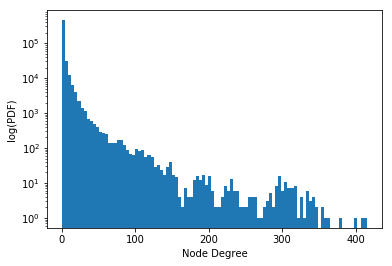

In [8]:
degrees = [degree for node,degree in dict(G.degree()).items()]
plt.hist(degrees,100)
plt.yscale('log')
plt.xlabel('Node Degree')
plt.ylabel('log(PDF)')

I now choose the nodes with degrees > 150 (highly cited patents) and analyse their graph:

In [9]:
# del F2

In [10]:
def draw_graph(G):
    pos=nx.spring_layout(G) # positions for all nodes
    # nodes
    nx.draw_networkx_nodes(G,pos, node_color='r',node_size=5,alpha=0.4)
    #edges
    nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.9)

In [11]:
F2 = G.copy()
remove = [node for node,degree in dict(F2.degree()).items() if degree <150]
F2.remove_nodes_from(remove)
remove2 = [node for node,degree in dict(F2.degree()).items() if degree <3]
F2.remove_nodes_from(remove2)

print(len(list(F2)))
# draw_graph(F2)
print(nx.info(F2))

148
Name: 
Type: Graph
Number of nodes: 148
Number of edges: 2391
Average degree:  32.3108


Next, I look at the average clustering degree for both the original graph, and the subgraph with only high-degree nodes.
Clustering degree is a measure of the degree to which the nodes tend to cluster together on average.

In [12]:
nx.average_clustering(G)

0.010989834814006304

In [13]:
nx.average_clustering(F2)

0.05377135932537781

Note that the average clustering is much higher for of the subgraph where the citations are higher. Below, I plot the subgraph.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


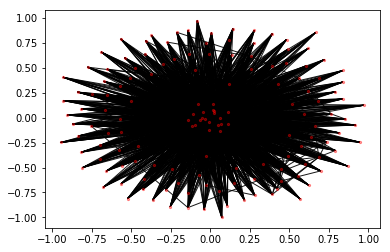

In [14]:
draw_graph(F2)